## Фаткуллин Тимерхан (7112)
Данные можно взять отсюда: https://github.com/Laggg/data--for--students ("flight_delays.csv")

# Задача:
Научиться предсказывать задержку (столбик **dep_delayed_15min**) рейса по имеющимся данным с помощью Дерева решений (или других алгоритмов). Это задача бинарной классификации (будет/не будет задержка). Улучшить приведенный пример.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# взглянем на исходную таблицу данных
file_name = "flight_delays.csv"
data = pd.read_csv(file_name)
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [3]:
data.shape

(100000, 9)

## Исходный пример

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score

import itertools
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [5]:
# возьмем несколько столбцов данных как признаки, по которым будем предсказывать:
X = data[['DepTime','Distance', 'Month']]

X['DepTime'] = X['DepTime'] // 100  # оставляем только час вылета
X['DepTime'].loc[X['DepTime'] == 24] = 0
X['DepTime'].loc[X['DepTime'] == 25] = 1

X['Month'] = X['Month'].apply(lambda x: int(x[2:]))  # номер месяца в численной форме

X.head()

,DepTime,Distance,Month
0,19,732,8
1,15,834,4
2,14,416,9
3,10,872,11
4,18,423,10


In [6]:
# отделим столбик-таргет от признаков:
target = (data['dep_delayed_15min'] == 'Y').astype(int)

target.head()

0    0
1    0
2    0
3    0
4    1
Name: dep_delayed_15min, dtype: int32

In [7]:
# разделим выборку на обучающую и тестовую (проверочную)
x_train, x_test, y_train, y_test = train_test_split(X, target,
                                                    test_size=0.1, random_state=42)

# обучим модель дерева на обучающей выборке и предскажем на отложенной:
model = DecisionTreeClassifier(max_depth=40, min_samples_split=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [8]:
def plot_confusion_matrix(targets, predictions, classes,
                          normalize=False, title='Confusion matrix',
                          figsize=(4, 4), cmap=plt.cm.Reds):

    conf_matrix = confusion_matrix(y_true=targets,
                                   y_pred=predictions)

    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title.lower()

    plt.figure(figsize=figsize)
    
    plt.imshow(conf_matrix, interpolation='nearest',
               cmap=cmap)
    
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):

        if normalize:
            value = '{} %'.format(format(conf_matrix[i, j] * 100, '.2f'))
        else:
            value = format(conf_matrix[i, j], fmt)

        plt.text(j, i, value,
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

Общее число совпадений: 74.5 %
Полнота охвата класса "1" (рейс задержан): 22.6 %
Точность (precision): 29.1 %


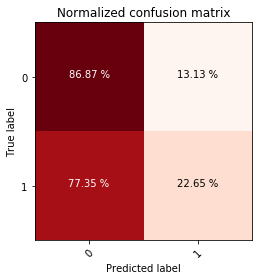

In [9]:
# матрица ошибок алгоритма; при хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений: {:.1f} %'.format(100 * accuracy_score(y_test, y_pred)))
print('Полнота охвата класса "1" (рейс задержан): {:.1f} %'.format(100 * recall_score(y_test, y_pred)))
print('Точность (precision): {:.1f} %'.format(100 * precision_score(y_test, y_pred)))

plot_confusion_matrix(y_test, y_pred,
                      classes=[0, 1], normalize=True)

In [10]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[7015, 1060],
       [1489,  436]], dtype=int64)

## Улучшенный пример

Подсказка – для работы с категориальными признаками прочитайте про **Label Encoder** и **OneHot Encoder**.

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [12]:
# отделим столбик-таргет от признаков:
target = (data['dep_delayed_15min'] == 'Y').astype(int)

target.head()

0    0
1    0
2    0
3    0
4    1
Name: dep_delayed_15min, dtype: int32

In [13]:
X = data[['Distance', 'DepTime', 'DayofMonth']]

X['DepTime'] = X['DepTime'] // 100  # оставляем только час вылета
X.loc[X['DepTime'] == 24, 'DepTime'] = 0
X.loc[X['DepTime'] == 25, 'DepTime'] = 1

#X['Month'] = X['Month'].apply(lambda x: int(x[2:]))
X['DayofMonth'] = X['DayofMonth'].apply(lambda x: int(x[2:]))
#X['DayOfWeek'] = X['DayOfWeek'].apply(lambda x: int(x[2:]))

X.head()

,Distance,DepTime,DayofMonth
0,732,19,21
1,834,15,20
2,416,14,2
3,872,10,25
4,423,18,7


In [14]:
def add_cat_attribute (label: str, X: np.ndarray):
    tmp = np.array(data[label]).reshape((-1, 1))
    enc = OneHotEncoder()
    tmp = enc.fit_transform(tmp).toarray()
    
    return np.concatenate((X, tmp), axis=1)

In [15]:
tmp = np.array(X)
for label in tuple(['UniqueCarrier']):
    tmp = add_cat_attribute(label, tmp)
X_ = tmp
X_.shape

(100000, 25)

In [16]:
# разделим выборку на обучающую и тестовую (проверочную)
x_train, x_test, y_train, y_test = train_test_split(X_, target,
                                                    test_size=0.1, random_state=42)

# обучим модель дерева на обучающей выборке и предскажем на отложенной:
model = DecisionTreeClassifier(max_depth=40, min_samples_split=2, min_samples_leaf=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Общее число совпадений: 73.4 %
Полнота охвата класса "1" (рейс задержан): 30.8 %
Точность (precision): 30.9 %


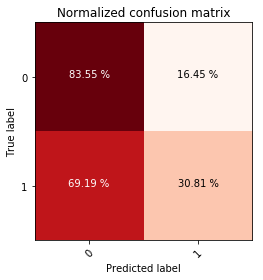

In [17]:
# матрица ошибок алгоритма; при хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений: {:.1f} %'.format(100 * accuracy_score(y_test, y_pred)))
print('Полнота охвата класса "1" (рейс задержан): {:.1f} %'.format(100 * recall_score(y_test, y_pred)))
print('Точность (precision): {:.1f} %'.format(100 * precision_score(y_test, y_pred)))

plot_confusion_matrix(y_test, y_pred,
                      classes=[0, 1], normalize=True)
plt.savefig('test', dpi=400)

In [18]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[6747, 1328],
       [1332,  593]], dtype=int64)